Convnet Intro

In [19]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [13]:

REBUILD_DATA = True

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "CATS_V_DOGS/PetImages/Cat"
    DOGS = "CATS_V_DOGS/PetImages/Dog"
    LABELS = {CATS:0, DOGS: 1}

    training_data = []
    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats:" , self.catcount)
        print("Dogs:" , self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|██████████| 12501/12501 [00:14<00:00, 867.16it/s]


CATS_V_DOGS/PetImages/Cat
OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.2.0) C:\projects\opencv-pytho

In [16]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [29]:
print(training_data[0])

[array([[159, 163, 162, ..., 108, 110, 111],
       [158, 167, 168, ..., 112, 109, 108],
       [161, 169, 188, ..., 112, 112, 111],
       ...,
       [149, 158, 166, ..., 166, 164, 159],
       [149, 150, 159, ..., 171, 166, 154],
       [143, 147, 153, ..., 164, 169, 155]], dtype=uint8)
 array([0., 1.])]


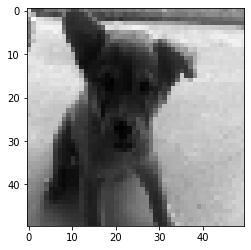

[0. 1.]


In [42]:
import matplotlib.pyplot as plt
num = 10000
plt.imshow(training_data[num][0], cmap='gray')
plt.show()
print(training_data[num][1])

to create one-hot vector

https://en.wikipedia.org/wiki/One-hot

In [ ]:
np.eye(10)


